In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../replication-materials-yuanninghuang-1/CECC/CES22_Common.csv")

/var/folders/zg/n9l4w3gd6w98b4wdky4vmq1m0000gn/T/ipykernel_21372/2776905057.py:1: DtypeWarning: Columns (359,360,363,364,613,614,617,618) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../replication-materials-yuanninghuang-1/CECC/CES22_Common.csv")


In [4]:
df.head()

,caseid,tookpost,commonweight,commonpostweight,CCEStake,add_confirm,inputzip,birthyr,gender4,gender4_t,...,page_CC22_441_grid_timing,page_CC22_443_timing,page_gunown_timing,page_numchildren_timing,page_edloan_timing,page_student_timing,starttime,endtime,starttime_post,endtime_post
0,1983126005,2,3.649671,3.525008,1,1.0,NaN,1992,1,__NA__,...,12.128,12.506,6.337,6.265,2.863,0.0,1.980030e+12,1.980030e+12,1.985230e+12,1.985230e+12
1,1983126559,2,0.780431,0.818539,1,NaN,1331.0,1957,1,__NA__,...,18.707,21.805,3.126,9.023,3.722,0.0,1.980030e+12,1.980030e+12,1.986030e+12,1.986030e+12
2,1983126197,2,0.891555,0.774314,1,1.0,NaN,1978,2,__NA__,...,6.448,4.443,2.105,3.108,3.622,0.0,1.980030e+12,1.980030e+12,1.984610e+12,1.984610e+12
3,1979974411,2,1.103598,1.207156,1,NaN,6716.0,1991,3,__NA__,...,11.287,10.843,5.421,4.947,3.000,0.0,1.980030e+12,1.980030e+12,1.984480e+12,1.984490e+12
4,1983130427,2,0.542923,0.327550,1,2.0,21401.0,1991,1,__NA__,...,12.222,19.317,3.458,3.843,4.173,0.0,1.980030e+12,1.980030e+12,1.985620e+12,1.985620e+12


Filter: post: CC22_401 (5)

Independent variable:
State: inputstate
Region: region
Partisanship: pid3, CC22_360
Strength of partisanship: pid7
Stance on abortion: CC22_332grid, CC22_350d
Vote 2020: presvote20post
Vote 2016: presvote16post

Dependent variable: 
Vote-pre: CC22_363, CC22_365_voted, CC22_365
Vote-post: CC22_411

Control Variables:
Gender: gender4
Age: birthyr
Race: race
Education: educ
Income: faminc_new
Marietal Status:marstat
Religiosity: pew_religimp, pew_bornagain, pew_churatd, religpew
Urban-rural residence: urbancity
Political ideology: CC22_340grid, ideo5
Approval: CC22_320grid
Political engagement: 
    pre: CC22_310grid, CC22_311grid
    post: CC22_430a, CC22_430b
View on economy: CC19_302, CC22_303, CC22_304

In [21]:
df_filled = df.fillna(-1)

In [ ]:
ids = ["caseid", 'tookpost', 'commonweight', 'commonpostweight']
dvs = ['CC22_363', 'CC22_365_voted',]

post: [CC22_401] {single} Which of the following statements best describes you? (Allows one selection)
◯ [1] I did not vote in the election this November.
◯ [2] I thought about voting this time – but didn't.
◯ [3] I usually vote, but didn't this time.
◯ [4] I attempted to vote but did not or could not.
◯ [5] I definitely voted in the November 2022 General Election.


pre: [CC22_365_voted] {single} For which candidate for U.S. Senator did you vote? (Allows one selection)
◯ [1] $SenCand1Name ($SenCand1Party) 
◯ [2] $SenCand2Name ($SenCand2Party) 
◯ [3] $SenCand3Name ($SenCand3Party) 
◯ [4] $SenCand4Name ($SenCand4Party) 
◯ [7] Other
◯ [8] I'm not sure
◯ [9] I didn't vote in this election


post: [CC22_411] {single} For whom did you vote for U.S. Senator? (Allows one selection)
◯ [1] $SenCand1Name ($SenCand1Party) 
◯ [2] $SenCand2Name ($SenCand2Party) 
◯ [3] $SenCand3Name ($SenCand3Party) 
◯ [4] $SenCand4Name ($SenCand4Party) 
◯ [5] Other
◯ [6] I did not vote in this race 
◯ [7] I did not vote
◯ [8] Not sure

In [56]:
# Create a new dataframe with 'caseid', 'voted', and 'senate_vote_choice' columns
new_df = df[['caseid']].copy()

# Create the 'voted' variable
new_df['voted'] = (df['CC22_401'] == 5).astype(int)

def get_senate_vote_choice(row):
    pre_vote = row['CC22_365_voted']
    post_vote = row['CC22_411']

    def get_candidate_info(vote, suffix=''):
        if 1 <= vote <= 4:
            return row[f'SenCand{int(vote)}Name{suffix}'], row[f'SenCand{int(vote)}Party{suffix}']
        else:
            return None, None

    if pd.notna(pre_vote) and pd.notna(post_vote):
        if pre_vote == post_vote:
            name, party = get_candidate_info(post_vote, '_post')
            return post_vote, name, party
        else:
            return float('nan'), None, None  # set as missing if contradictory responses
    elif pd.notna(pre_vote):
        name, party = get_candidate_info(pre_vote)
        return pre_vote, name, party
    elif pd.notna(post_vote):
        name, party = get_candidate_info(post_vote, '_post')
        return post_vote, name, party
    else:
        return float('nan'), None, None  # set as missing if both are missing

# Apply the updated function to the dataframe
new_df[['senate_vote_choice', 'senator_name', 'party']] = df.apply(get_senate_vote_choice, axis=1, result_type='expand')

new_df.head()


,caseid,voted,senate_vote_choice,senator_name,party
0,1983126005,1,NaN,NaN,NaN
1,1983126559,1,NaN,NaN,NaN
2,1983126197,1,1.0,John Fetterman,Democratic
3,1979974411,1,1.0,Richard Blumenthal,Democratic
4,1983130427,0,NaN,NaN,NaN


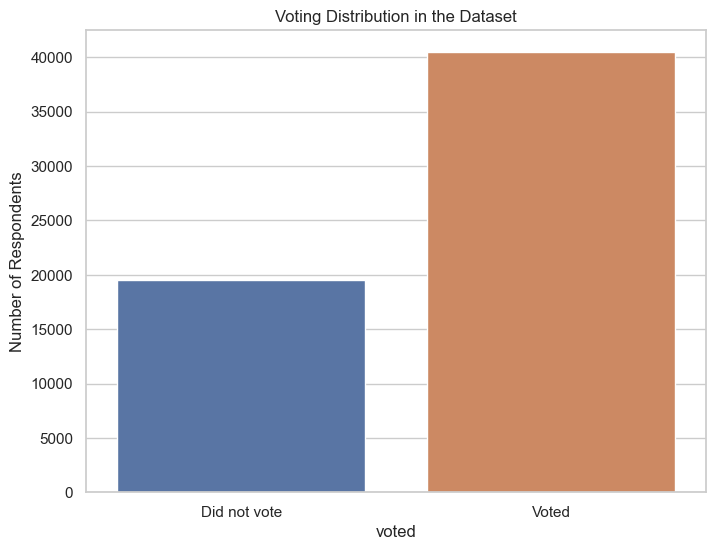

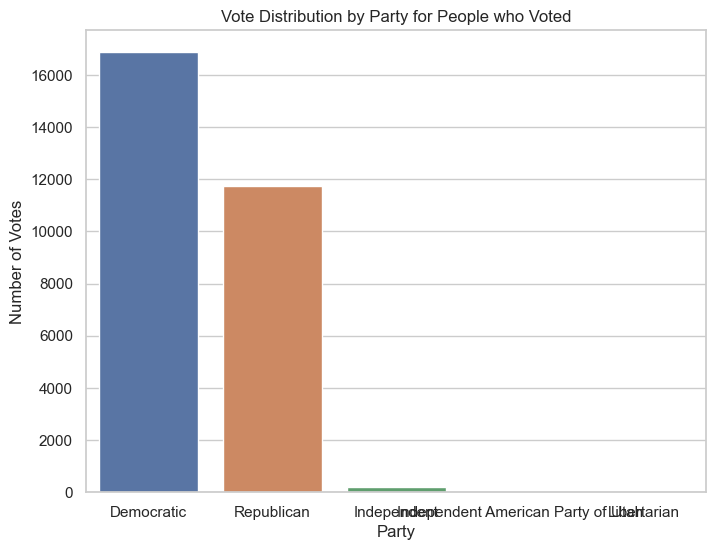

In [57]:
# Set the style for the plots
sns.set(style='whitegrid')

# Plot the distribution of how many people voted in the dataset
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=new_df, x='voted')
ax.set_xticklabels(['Did not vote', 'Voted'])
ax.set_title('Voting Distribution in the Dataset')
ax.set_ylabel('Number of Respondents')
plt.show()

# Plot the distribution of people who voted for each party
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=new_df[new_df['voted'] == 1], x='party')
ax.set_title('Vote Distribution by Party for People who Voted')
ax.set_xlabel('Party')
ax.set_ylabel('Number of Votes')
plt.show()
